In [1]:
cd Downloads/

/Users/daviscuen/Downloads


Filename: hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   
Mean = 0.0
Noise = 0.0006801039562560618
Number of objects found = 804
Detection threshold = 20.0
object 0: flux = 1.936743 +/- 1.391674
object 1: flux = 0.535638 +/- 0.731882
object 2: flux = 1.330535 +/- 1.153494
object 3: flux = 0.927175 +/- 0.962906
object 4: flux = 0.374289 +/- 0.611802
object 5: flux = 0.803016 +/- 0.896119
object 6: flux = 0.848161 +/- 0.920964
object 7: flux = 0.459973 +/- 0.678223
object 8: flux = 1.234782 +/- 1.111213
object 9: flux = 0.987787 +/- 0.993881


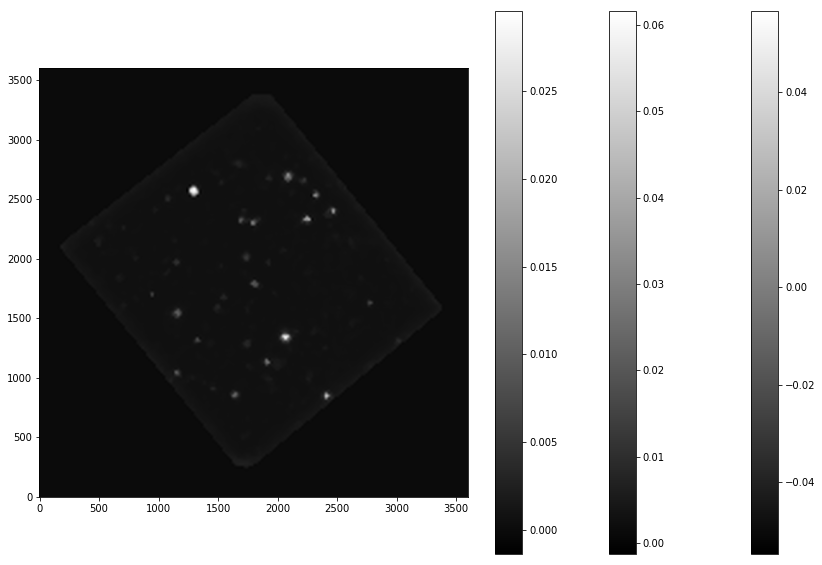

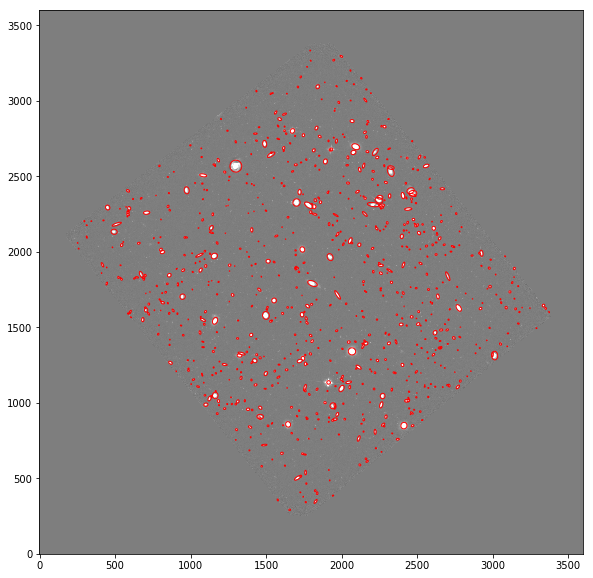

In [2]:
#image.fits
#hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
#hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits
#hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits


#First navigate to the directory that has the file of the image you would like to use (ie. cd Downloads/)


from astropy.io import fits
import sep
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
#imports nessasary libraries


%matplotlib inline
#shows figures 

rcParams['figure.figsize'] = [15., 10.]
#sets the [height, width] of the image plots

fname = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
hdu_list = fits.open(fname)
#read image from fits file in downloads and puts the information into standard 2D numpy array
hdu_list.info()
#then it prints all the info for the fits file to the screen

data=hdu_list[0].data
#Saves the information under the Primary section to a variable called data
data=data.byteswap(False).newbyteorder()
#swaps the byte amount of data to an amount readable by the astropy.io fits


#Fig 1
m, s = np.mean(data) , np.std(data)
plt.imshow(data, interpolation='nearest' , cmap='gray' , vmin=m-s, vmax = m+s)
plt.colorbar();
#show the image with no manipulation done yet
#maps the image in grey with greyness proportional to flux
#interpolation fills in the gaps between pixals
#interpolation=nearest fills in the empty space inbetween pixals due to resizing (makes image more pixalated) 
#origin=upper keeps the image as is while origin=lower inverts the image
#puts a scale of colors next to the plot so the different shades of grey can be interpreted 
#vmax is the mean grey scale plus the standard deviation of greyness and vmin is the mean grey scale minus the standard deviation of greyness

plt.savefig('First_plot_125.png')
#Saves the image in downloads(or wherever the fits file was stored) under 'First_plot_125' and as a PNG file


#measures how much global background there is in the image and saves that data under bkg
bkg = sep.Background(data, bw=20, bh=20, fw=3, fh=3)
#bw&bh set the size of the background filter
#fw&fh set the size of which boxes to filter


print('Mean = ' + str(bkg.globalback))
print('Noise = ' + str(bkg.globalrms))
#get a mean and noise of the image background

bkg_image = np.array(bkg)
#puts the background image the same size as original image (2d array) so we can plot it

#Fig 2
plt.imshow(bkg_image, interpolation='nearest', cmap ='gray', origin='lower')
plt.colorbar();
#plots the background image, constraint meanings same as Fig 1

plt.savefig('Second_plot_125.png')
##Saves the image in downloads(or wherever the fits file was stored) under 'Second_plot_125' and as a PNG file

bkg_rms = bkg.rms()
#measure background noise, same size as original image (2d array) so we can plot it

#Fig 3
plt.imshow(bkg_rms,interpolation='nearest', cmap ='gray', origin='lower')
plt.colorbar();
#plots the background noise image with same constraint meanings as Fig 1

plt.savefig('Third_plot_125.png')
#Saves the image in downloads(or wherever the fits file was stored) under 'Third_plot_125' and as a PNG file

data_sub = data - bkg
#subtracting the background from the data to get just the objects



#object detection

thresh = 20.
#!!!sets a threshold for how big of a standard deviation of objects that will be counted
objects = sep.extract(data_sub, thresh, err=bkg.globalrms)
#extracts the amount of objects that are in the background subtracted image that are in the threshold limit and saves them in a list called objects


print("Number of objects found = " + str(len(objects)))
print("Detection threshold = " + str(thresh))
#prints the number of objects detected and what threshold was used



#plot background subtracted image
from matplotlib.patches import Ellipse
#imports library to draw ellipses around objects found

#FIG 4
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
#plots the image of data that has had the background subtracted so we can see the objects with the same constraint meanings as Fig 1

plt.savefig('Fourth_plot_125.png')
#Saves the image in downloads(or wherever the fits file was stored) under 'Fourth_plot_125' and as a PNG file

#plots an ellipse around each object detected
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=6*objects['a'][i],height=6*objects['b'][i],angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
#plots a red ellipse around each detected object that is 6 times as large as the object and in the angle of the object
    
#objects.dtype.names
# shows different types of information that we can see about an object


#circular aperture photometry (measure of flux)

flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
#gives the flux and error of flux of the objects detected with a 3 pixal radius

for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))
#loops through the first 10 objects and prints the flux and error of the flux 




Range of flux: 0.26797825786285107 through 810.7354414558413


(array([277., 143.,  90., ...,   0.,   0.,   1.]),
 array([2.67978258e-01, 5.60354688e-01, 8.52731117e-01, ...,
        8.10150689e+02, 8.10443065e+02, 8.10735441e+02]),
 <a list of 2772 Patch objects>)

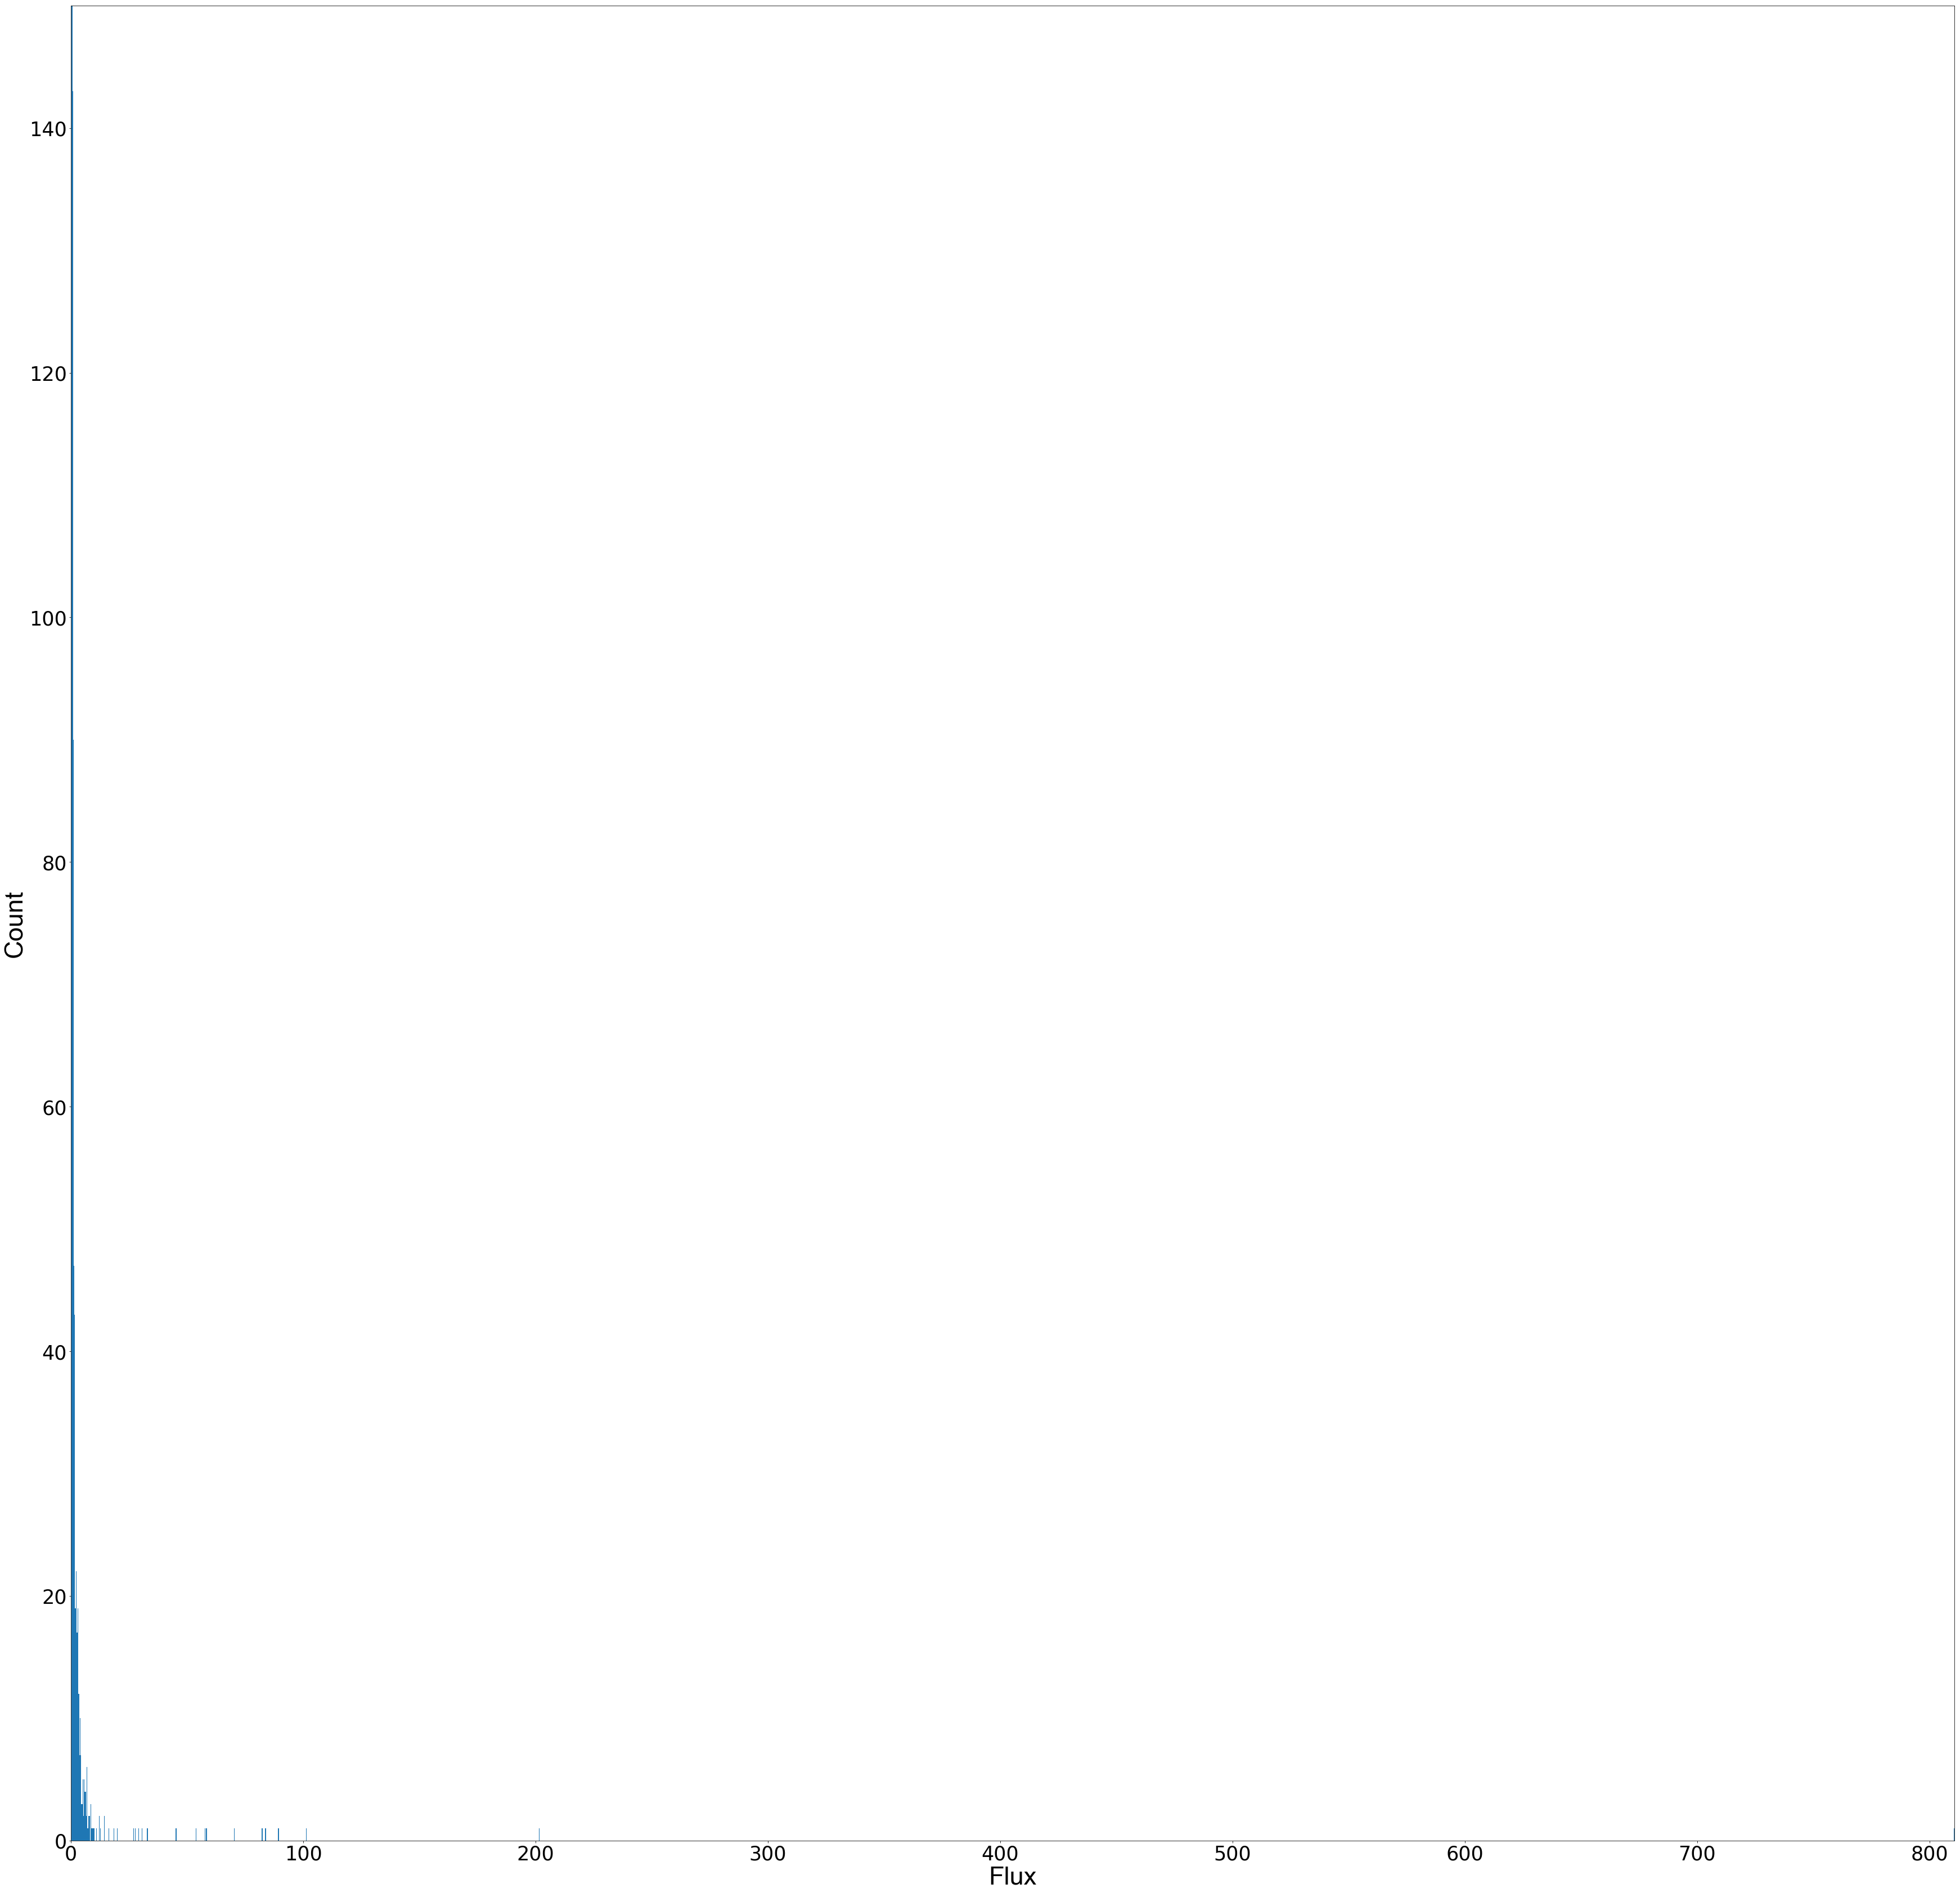

In [4]:
#Histogram of flux
#For some reason, the histogram comes out with the wrong font sizes the first time I run this code but if I run the exact same code again, it will come out with the correct histogram
float_flux = [float(x) for x in flux]


sorted_flux=sorted(float_flux)
print('Range of flux: ' + str(sorted_flux[0]) +' through '+ str(sorted_flux[len(sorted_flux)-1]))

axis_font = {'fontname':'Arial', 'size':'45'}

plt.xlim(0,max(sorted_flux))
plt.ylim(0,150)
plt.xlabel("Flux", **axis_font)
plt.ylabel("Count", **axis_font)
plt.rc('xtick', labelsize=35.)
plt.rc('ytick', labelsize=35.)
rcParams['figure.figsize'] = [60., 60.]
plt.hist(sorted_flux, bins = 'auto')